# Install necessary libraries if not installed

In [3]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score,
                             roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt


# 1. Create an imbalanced dataset

In [4]:
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=3, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9, 0.1],
                           flip_y=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# 2. Train a classifier

In [5]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

# 3. Confusion Matrix

In [6]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[268   2]
 [  5  25]]


# 4. Precision, Recall, F1

In [7]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")

Precision: 0.93
Recall:    0.83
F1-Score:  0.88


# 5. Full Classification Report

In [8]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       270
           1       0.93      0.83      0.88        30

    accuracy                           0.98       300
   macro avg       0.95      0.91      0.93       300
weighted avg       0.98      0.98      0.98       300



# 6. ROC Curve & ROC AUC

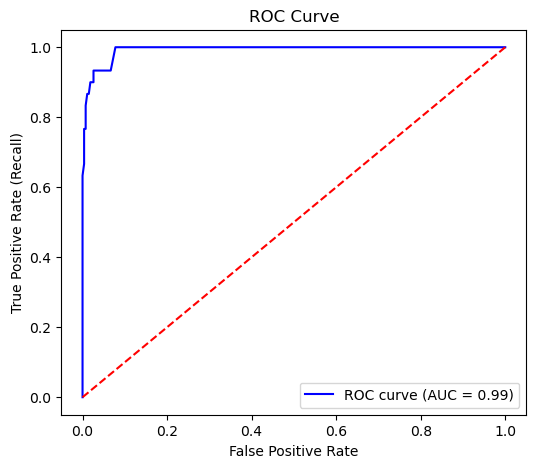

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 7. Precision-Recall Curve & PR AUC

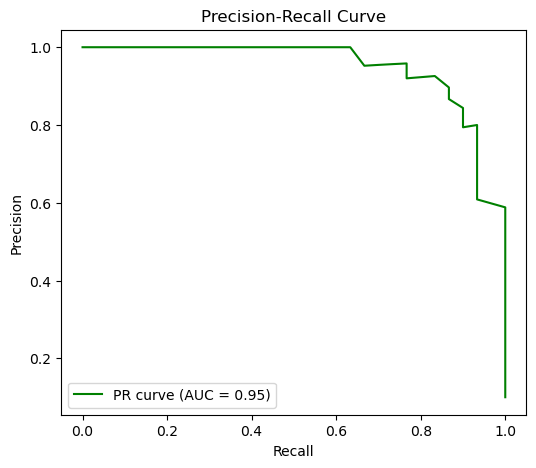

In [10]:
precision_vals, recall_vals, thresholds_pr = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

plt.figure(figsize=(6,5))
plt.plot(recall_vals, precision_vals, color='green', label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()